# Preamble

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn import metrics

# 2. Data Preprocessing

In [ ]:
df = pd.read_excel('Dry_Bean_Dataset.xlsx')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [108]:
"""
def scaling(X)
  scaler = MinMaxScaler
  X_scaled = scaler.transform(X)
  return X_scaled
"""

'\ndef scaling(X)\n  scaler = MinMaxScaler\n  X_scaled = scaler.transform(X)\n  return X_scaled\n'

# EDA

In [ ]:
#sns.pairplot(df,hue="Class")

<img src="/content/pairplot.png">


In [ ]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


to find the count of examples in each class

In [ ]:
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

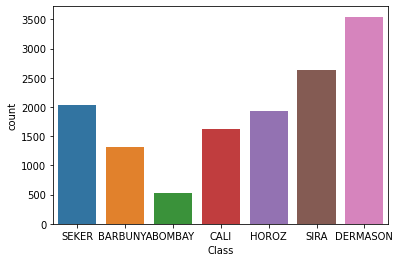

In [ ]:
ax = sns.countplot(x='Class',data = df)

We see that the distribution of the dataset is very uneven.<br>
the least is 'BOMBAY' with 522 <br>
and the largest count in 'DERMASON' with 3546

# Stratified Cross validation

**we will use stratified cross-validation beacuse we see that our data is skewed. hence for uniform distribution for training we use this method.**

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
df["kfold"] = -1
df = df.sample(frac=1).reset_index(drop = True)

y = df.Class.values

kf = StratifiedKFold(n_splits=7)

for f, (t_, v_) in enumerate(kf.split(X = df, y=y)):
  df.loc[v_,'kfold'] = f

In [ ]:
df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class,kfold
0,51052,848.581,311.005178,209.539906,1.484229,0.738959,51644,254.953771,0.712718,0.988537,0.890914,0.819773,0.006092,0.001697,0.672028,0.997444,SIRA,0
1,80050,1078.541,403.006129,253.685414,1.588606,0.777014,80805,319.253544,0.807998,0.990657,0.864765,0.792180,0.005034,0.001223,0.627550,0.996929,BARBUNYA,0
2,40570,737.047,248.719348,208.315230,1.193957,0.546359,40979,227.278086,0.750685,0.990019,0.938479,0.913793,0.006131,0.002637,0.835018,0.996976,SEKER,0
3,38147,727.240,265.557172,183.432597,1.447710,0.723097,38558,220.386635,0.718751,0.989341,0.906389,0.829903,0.006961,0.002037,0.688739,0.997094,SIRA,0
4,71194,1045.404,402.703822,228.822875,1.759893,0.822879,72636,301.076429,0.808729,0.980148,0.818625,0.747637,0.005656,0.001090,0.558962,0.983713,CALI,0
5,49207,848.510,334.321971,188.083857,1.777515,0.826741,49790,250.304411,0.780036,0.988291,0.858861,0.748693,0.006794,0.001317,0.560541,0.996370,SIRA,0
6,54082,914.723,375.883942,185.422855,2.027172,0.869860,54939,262.410634,0.720248,0.984401,0.812238,0.698116,0.006950,0.001018,0.487366,0.987975,HOROZ,0
7,76890,1076.649,416.749392,237.324692,1.756030,0.822015,78603,312.888780,0.792337,0.978207,0.833550,0.750784,0.005420,0.001062,0.563677,0.989833,CALI,0
8,32794,665.443,245.877490,170.296869,1.443817,0.721314,33131,204.339467,0.787844,0.989828,0.930642,0.831062,0.007498,0.002206,0.690664,0.997193,DERMASON,0
9,39170,748.606,290.257632,172.183043,1.685750,0.805050,39644,223.322173,0.806565,0.988044,0.878328,0.769393,0.007410,0.001602,0.591965,0.997906,DERMASON,0


In [ ]:
df.kfold.value_counts()

2    1945
1    1945
0    1945
6    1944
5    1944
4    1944
3    1944
Name: kfold, dtype: int64

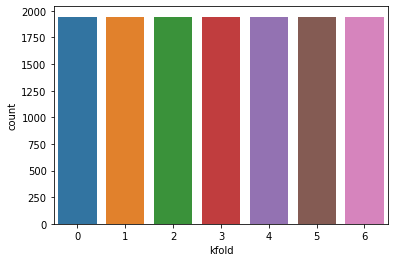

In [ ]:
k = sns.countplot(x='kfold',data = df)

In [ ]:
for i in range(7):
  print(df[df.kfold==i].Class.value_counts())
  
  print('\n')

DERMASON    506
SIRA        377
SEKER       289
HOROZ       276
CALI        233
BARBUNYA    189
BOMBAY       75
Name: Class, dtype: int64


DERMASON    506
SIRA        377
SEKER       289
HOROZ       276
CALI        233
BARBUNYA    189
BOMBAY       75
Name: Class, dtype: int64


DERMASON    507
SIRA        377
SEKER       289
HOROZ       275
CALI        233
BARBUNYA    189
BOMBAY       75
Name: Class, dtype: int64


DERMASON    507
SIRA        377
SEKER       290
HOROZ       275
CALI        233
BARBUNYA    188
BOMBAY       74
Name: Class, dtype: int64


DERMASON    507
SIRA        376
SEKER       290
HOROZ       275
CALI        233
BARBUNYA    189
BOMBAY       74
Name: Class, dtype: int64


DERMASON    507
SIRA        376
SEKER       290
HOROZ       275
CALI        233
BARBUNYA    189
BOMBAY       74
Name: Class, dtype: int64


DERMASON    506
SIRA        376
SEKER       290
HOROZ       276
CALI        232
BARBUNYA    189
BOMBAY       75
Name: Class, dtype: int64




we see that in each fold the distribution of targets is the same. This will make our data more uniform for better training.

## Feature Selection

In [ ]:
all_features = df.columns[:-2]
all_features

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4'],
      dtype='object')

1. checking out how correlated our data looks.

In [ ]:
df.corr()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,kfold
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721,-0.002125
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310,-0.002203
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527,-0.002741
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749,-0.000737
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264,-0.002759
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354,-0.002172
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049,-0.002221
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512,-0.001801
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502,-0.001999
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163,0.011128


In [ ]:
correlation_matrix = df.corr()

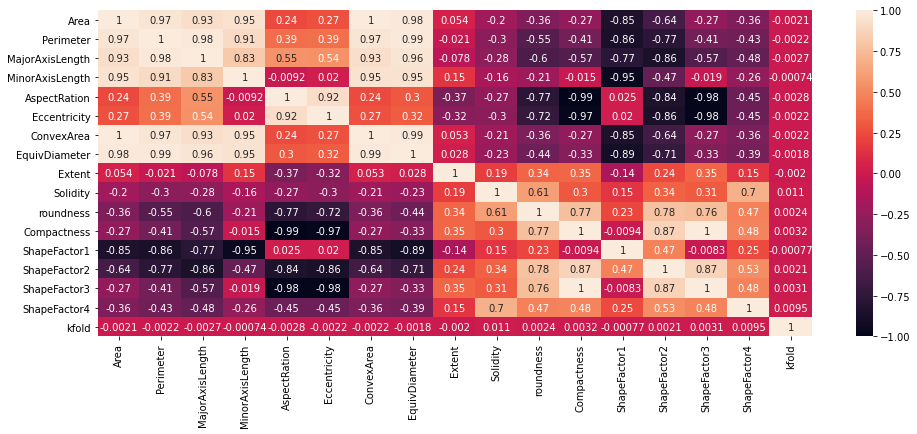

In [ ]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


In [ ]:
correlated_features = set()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)


print(correlated_features)


ShapeFactor3
{'Perimeter', 'ShapeFactor3', 'MinorAxisLength', 'EquivDiameter', 'MajorAxisLength', 'Compactness', 'ConvexArea'}


observations: we notice that many features are highly correlated with each other. <br>
<li> Area and Perimeter
<li> Area and MajorAxisLength
<li> Area and MinorAxisLength
<li> Area and ConvexArea
<li> Area and equivDiameter
<li> Perimeter and MajorAxisLength
<li> Perimeter and equivDiameter
<li> Perimeter and ConvexArea<br>
and so on.....<br>
Hence we will remove few fetures using **greedy method**


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier


def feature_selection_(X,y):
  #returns best feature based on the model performance of RandomForest

  good_features=[]
  best_scores=[]

  num_features = X.shape[1]

  while True:
    best_score = 0
    this_feature = None

    for feature in range(num_features):
      if feature in good_features:
        continue # if features already in good features list then we continue
      
      selected_features = good_features + [feature]

      xtrain = X[:,selected_features]

      model = RandomForestClassifier()
      model.fit(xtrain, y)
      predictions = model.predict_proba(xtrain)[:,1]
      score = metrics.roc_auc_score(y,predictions, multi_class="ovr")

      #if score> best score then change best score and good_features
      if score> best_score:
        this_feature = feature
        best_score = score
      
      if this_feature != None:
        good_features.append(this_feature)
        best_scores.append(best_score)
      
      #if the scores are not improving from previous round, then we exit the loop

      if len(best_scores)>2:
        if best_scores[-1] < best_scores[-2]:
          break
      
      # we will use this function in the main function.
      return good_features[:-1]



## Training, modelling and Validating

In [ ]:
from sklearn import preprocessing

In [ ]:
def run(df, fold, model):

  features = df.columns[:-2]
  #features = feature_selection_(df.iloc[:,:-2].values,df.Class)

  """getting train and validation data. keeping the fold value in validation set 
  and remaining in training set"""
  df_train = df[df.kfold != fold].reset_index(drop = True)
  df_valid = df[df.kfold == fold].reset_index(drop = True)

  """ training data"""
  X_train = df_train[features]
  X_valid = df_valid[features]

  """ target class"""
  y_train = df_train.Class.values
  y_test = df_valid.Class.values

  """model fitting"""
  model.fit(X_train, y_train)

  """ predicting values using trained model"""
  y_pred = model.predict_proba(X_valid)[:,1]

  """calculating auc score for classification problem"""
  auc = metrics.roc_auc_score(y_test, y_pred, multi_class= 'ovr')

  print("Fold={} auc={}".format(fold,auc))

## Modelling

### i. SVM(Linear)

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', probability=True)

In [ ]:
for fold in range(7):
  run(df, fold, svm)

AxisError: ignored

### ii. SVM(Polynomial)

In [ ]:
svm_poly = SVC(kernel='poly')

In [ ]:
for fold in range(7):
  run(df, fold, svm_poly)

### iii. Decision trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(criterion="gini")

In [ ]:
for fold in range(7):
  run(df, fold, DT)



### iv. K-nearest neighborhood (kNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

In [ ]:
for fold in range(7):
  run(df, fold, knn)

### v. Multi-layer perceptron (MLP)

Hidden Layer Number 2 <br>
Hidden Layer Activation Function Sigmoid <br>
Output Layer Activation Number Sigmoid <br>
Learning Rate 0.3 <br>
Minimum Performance Gradient 1e−5 <br>
Performance Goal 1e−3 <br>
Maximum Number of Epochs to Train 500<br>

My Comments: <br>
errors: occured<br><br>
==> axis error. this is because y is 1d despite of being multilass. future: should map each class to a value for probability prediction in auc. <br>
==> unable to train any models due to this error. 
future: will come up with a more robust approach to complete this problem. <br><br>

Future scope:<br>
==> to complete the neural network model training<br>
==> to plot the boundaries by reducing the dimensions to gain a visual feeling.<br>
==> to do a detailed comparison of all the models performances.<br>
==> to reduce the errors.<br>

